<a href="https://colab.research.google.com/github/nazrann233/Bitcoin-and-Gold-prediction-in-MYR/blob/main/FYP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# 1) Remove the currently loaded numpy/pmdarima wheels
!pip install --upgrade --force-reinstall "numpy==1.26.4" "pmdarima==2.0.4" "Cython>=0.29.36"

# 2) Restart the runtime / kernel (VERY IMPORTANT)
# In Colab: Runtime > Restart runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
  Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 67.0 MB/s eta 0:00:00
Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.4/308.4 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 85.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Bawah ni template(packages)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

In [2]:
import pandas as pd

In [3]:
bitcoin = pd.read_csv('/content/Bitcoin.csv')
gold = pd.read_csv('/content/XAU MYR.csv')

In [4]:
merged = pd.merge(bitcoin, gold, on='Date', how='inner')
display(merged.head())

merged['Date'] = pd.to_datetime(merged['Date'], format='%m/%d/%Y')
merged = merged.sort_values(by='Date')

,Date,Price_x,Open_x,High_x,Low_x,Vol._x,Change %_x,Price_y,Open_y,High_y,Low_y,Vol._y,Change %_y
0,12/31/2024,"93,557.20","92,777.20","96,163.40","92,036.20",74.85K,0.84%,"11,723.19","11,637.94","11,750.45","11,612.15",229.20K,0.85%
1,12/30/2024,"92,779.80","93,718.70","94,936.40","91,522.30",112.43K,-1.00%,"11,624.68","11,716.68","11,750.01","11,590.70",206.81K,-0.70%
2,12/27/2024,"94,275.90","95,776.40","97,243.30","93,472.80",85.12K,-1.57%,"11,706.16","11,766.88","11,825.55","11,676.43",198.20K,-0.45%
3,12/26/2024,"95,777.70","99,389.40","99,922.50","95,193.30",74.60K,-3.64%,"11,759.60","11,736.45","11,795.49","11,708.12",205.70K,0.36%
4,12/25/2024,"99,391.30","98,661.90","99,514.10","97,651.90",39.80K,0.73%,"11,717.59","11,717.59","11,717.59","11,717.59",5.87K,0.00%


In [5]:
merged = pd.merge(bitcoin, gold, on='Date', how='inner')
merged = (merged.assign(Date=pd.to_datetime(merged['Date'], format='%m/%d/%Y')).sort_values('Date'))
display(merged.head())

,Date,Price_x,Open_x,High_x,Low_x,Vol._x,Change %_x,Price_y,Open_y,High_y,Low_y,Vol._y,Change %_y
2347,2016-01-01,434,430,438,425.9,46.97K,0.94%,"4,548.43","4,548.43","4,548.43","4,548.43",NaN,-0.01%
2346,2016-01-04,433.3,430.7,435.3,428.6,53.01K,0.61%,"4,662.44","4,574.06","4,709.66","4,557.88",NaN,2.51%
2345,2016-01-05,431.2,433.3,435.3,428.9,45.03K,-0.49%,"4,674.01","4,666.93","4,700.39","4,651.68",NaN,0.25%
2344,2016-01-06,430.8,431.2,432.1,425,43.43K,-0.09%,"4,799.37","4,682.52","4,812.76","4,671.22",NaN,2.68%
2343,2016-01-07,457,430.8,457.5,428.5,130.20K,6.09%,"4,867.63","4,803.86","4,878.60","4,793.13",NaN,1.42%


In [6]:
merged['Bitcoin'] = pd.to_numeric(merged['Price_x'].str.replace(',', ''))
merged['Gold']    = pd.to_numeric(merged['Price_y'].str.replace(',', ''))

In [8]:
import numpy as np

In [9]:
merged = merged.assign(
    Log_Return_Bitcoin = np.log(merged['Bitcoin']).diff(),
    Log_Return_Gold    = np.log(merged['Gold']).diff()
).dropna(subset=['Log_Return_Bitcoin', 'Log_Return_Gold'])

In [11]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Gold')

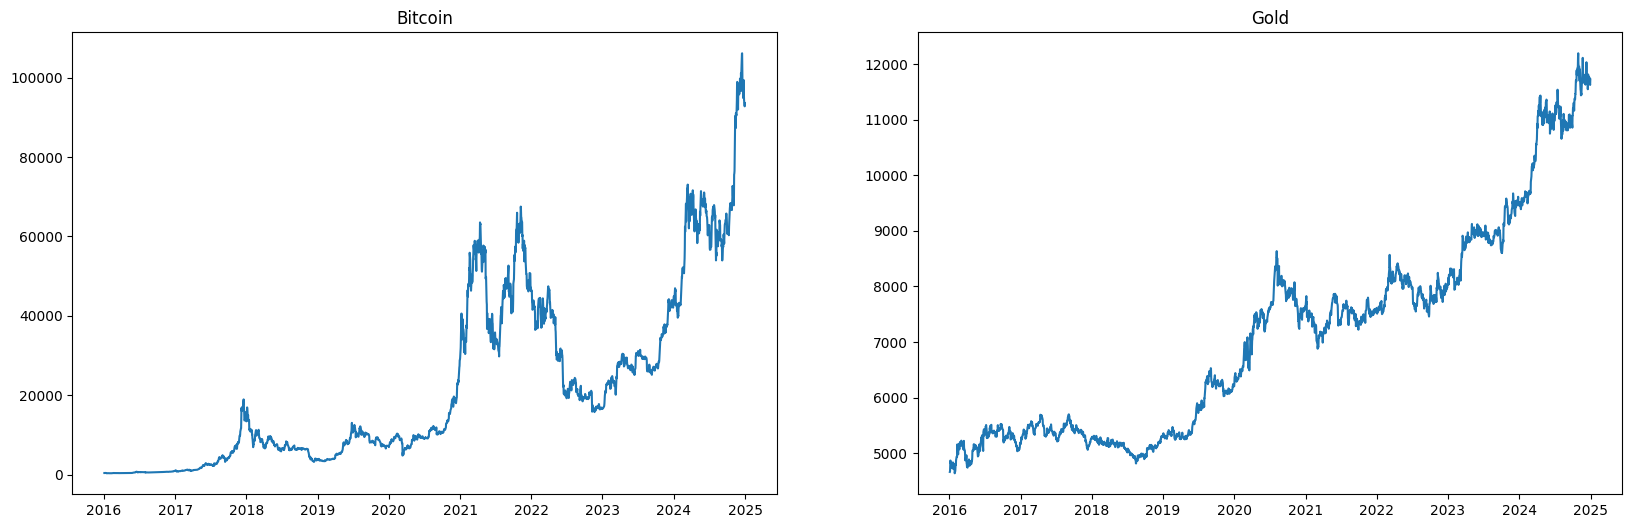

In [13]:

fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharex=True)

axes[0].plot(merged['Date'], merged['Bitcoin'])
axes[0].set_title('Bitcoin')

axes[1].plot(merged['Date'], merged['Gold'])
axes[1].set_title('Gold')


Text(0.5, 1.0, 'Log return Bitcoin & Gold')

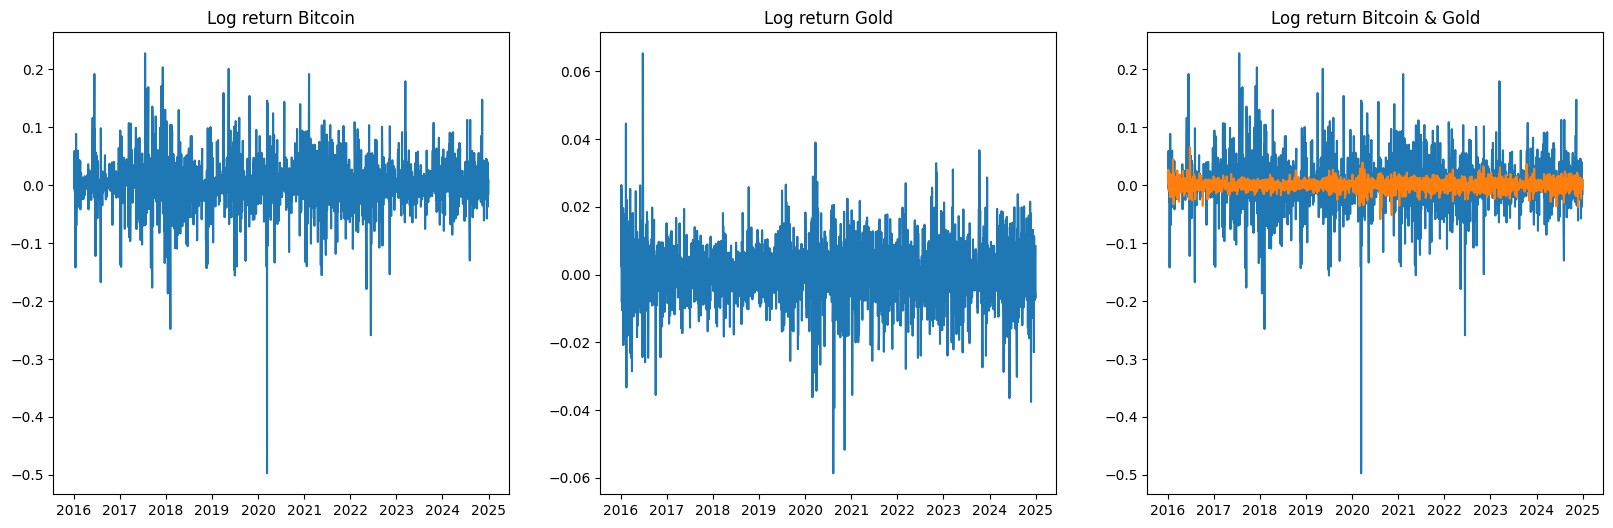

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharex=True)

axes[0].plot(merged['Date'], merged['Log_Return_Bitcoin'])
axes[0].set_title('Log return Bitcoin')

axes[1].plot(merged['Date'], merged['Log_Return_Gold'])
axes[1].set_title('Log return Gold')

axes[2].plot(merged['Date'], merged['Log_Return_Bitcoin'])
axes[2].plot(merged['Date'], merged['Log_Return_Gold'])
axes[2].set_title('Log return Bitcoin & Gold')

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:

adf_bitcoin_price = adfuller(merged['Bitcoin'])
print('ADF Test for Bitcoin Price:')
print(f'ADF Statistic: {adf_bitcoin_price[0]}')
print(f'p-value: {adf_bitcoin_price[1]}')
print('\n')

adf_gold_price = adfuller(merged['Gold'])
print('ADF Test for Gold Price:')
print(f'ADF Statistic: {adf_gold_price[0]}')
print(f'p-value: {adf_gold_price[1]}')
print('\n')

adf_bitcoin_log_return = adfuller(merged['Log_Return_Bitcoin'].dropna())
print('ADF Test for Bitcoin Log Returns:')
print(f'ADF Statistic: {adf_bitcoin_log_return[0]}')
print(f'p-value: {adf_bitcoin_log_return[1]}')
print('\n')

adf_gold_log_return = adfuller(merged['Log_Return_Gold'].dropna())
print('ADF Test for Gold Log Returns:')
print(f'ADF Statistic: {adf_gold_log_return[0]}')
print(f'p-value: {adf_gold_log_return[1]}')

ADF Test for Bitcoin Price:
ADF Statistic: -0.13956867997905525
p-value: 0.9453519206373471


ADF Test for Gold Price:
ADF Statistic: 0.7730620179684173
p-value: 0.9911886569322481


ADF Test for Bitcoin Log Returns:
ADF Statistic: -26.8726995484965
p-value: 0.0


ADF Test for Gold Log Returns:
ADF Statistic: -37.671379476336405
p-value: 0.0


In [17]:
from statsmodels.tsa.api import VAR

In [18]:
#need to know how many lag appropriate
data = merged[['Date', 'Log_Return_Bitcoin', 'Log_Return_Gold']].dropna()

model = VAR(data[['Log_Return_Bitcoin', 'Log_Return_Gold']])
lag_order = model.select_order(maxlags=10)
print(lag_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -15.69     -15.69*   1.529e-07     -15.69*
1       -15.70      -15.68   1.524e-07      -15.69
2      -15.70*      -15.67  1.522e-07*      -15.69
3       -15.70      -15.66   1.525e-07      -15.68
4       -15.70      -15.65   1.525e-07      -15.68
5       -15.70      -15.64   1.524e-07      -15.68
6       -15.69      -15.63   1.528e-07      -15.67
7       -15.69      -15.62   1.529e-07      -15.67
8       -15.69      -15.61   1.528e-07      -15.66
9       -15.69      -15.60   1.533e-07      -15.66
10      -15.69      -15.59   1.535e-07      -15.65
--------------------------------------------------


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


bawah ni correlation(not inportant just trying)

In [ ]:
df = pd.DataFrame(data)

print(df.corr())

                        Date  Log_Return_Bitcoin  Log_Return_Gold
Date                1.000000           -0.017407         0.009727
Log_Return_Bitcoin -0.017407            1.000000         0.094211
Log_Return_Gold     0.009727            0.094211         1.000000


Granger Causality Bawah Ni

In [19]:
from statsmodels.tsa.stattools import grangercausalitytests

In [20]:


print("Granger Causality Test: Does Gold log return Granger cause Bitcoin log return?")
granger_test_y_to_x = grangercausalitytests(data[['Log_Return_Bitcoin', 'Log_Return_Gold']], maxlag=2, verbose=True)
print('\n')


print("Granger Causality Test: Does Bitcoin log return Granger cause Gold log return?")
granger_test_x_to_y = grangercausalitytests(data[['Log_Return_Gold', 'Log_Return_Bitcoin']], maxlag=2, verbose=True)

Granger Causality Test: Does Gold log return Granger cause Bitcoin log return?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2644  , p=0.2609  , df_denom=2343, df_num=1
ssr based chi2 test:   chi2=1.2661  , p=0.2605  , df=1
likelihood ratio test: chi2=1.2657  , p=0.2606  , df=1
parameter F test:         F=1.2644  , p=0.2609  , df_denom=2343, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6437  , p=0.5254  , df_denom=2340, df_num=2
ssr based chi2 test:   chi2=1.2902  , p=0.5246  , df=2
likelihood ratio test: chi2=1.2898  , p=0.5247  , df=2
parameter F test:         F=0.6437  , p=0.5254  , df_denom=2340, df_num=2


Granger Causality Test: Does Bitcoin log return Granger cause Gold log return?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0483  , p=0.8261  , df_denom=2343, df_num=1
ssr based chi2 test:   chi2=0.0484  , p=0.8260  , df=1
likelihood ratio test: chi2=0.0483  , p=0.8260  , df=1
pa

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [21]:
n = len(data)

#70:30 split
train_size = int(n * 0.7)
train_70 = data[:train_size]
test_30  = data[train_size:]

#75:25 split
train_size = int(n * 0.75)
train_75 = data[:train_size]
test_25  = data[train_size:]

#80:20 split
train_size = int(n * 0.8)
train_80 = data[:train_size]
test_20  = data[train_size:]


print("70:30 split →", len(train_70), "train /", len(test_30), "test")
print("   Train period:", train_70['Date'].iloc[0], "to", train_70['Date'].iloc[-1])
print("   Test  period:", test_30['Date'].iloc[0], "to", test_30['Date'].iloc[-1])

print("\n75:25 split →", len(train_75), "train /", len(test_25), "test")
print("   Train period:", train_75['Date'].iloc[0], "to", train_75['Date'].iloc[-1])
print("   Test  period:", test_25['Date'].iloc[0], "to", test_25['Date'].iloc[-1])

print("\n80:20 split →", len(train_80), "train /", len(test_20), "test")
print("   Train period:", train_80['Date'].iloc[0], "to", train_80['Date'].iloc[-1])
print("   Test  period:", test_20['Date'].iloc[0], "to", test_20['Date'].iloc[-1])


70:30 split → 1642 train / 705 test
   Train period: 2016-01-04 00:00:00 to 2022-04-19 00:00:00
   Test  period: 2022-04-20 00:00:00 to 2024-12-31 00:00:00

75:25 split → 1760 train / 587 test
   Train period: 2016-01-04 00:00:00 to 2022-09-30 00:00:00
   Test  period: 2022-10-03 00:00:00 to 2024-12-31 00:00:00

80:20 split → 1877 train / 470 test
   Train period: 2016-01-04 00:00:00 to 2023-03-14 00:00:00
   Test  period: 2023-03-15 00:00:00 to 2024-12-31 00:00:00


In [22]:
from pmdarima import auto_arima

In [24]:
# Use auto_arima to find the best ARIMAX model
# The external_regressors parameter is used for the 'X' part of ARIMAX
# Include additional predictors in the exog DataFrame
model_arima = auto_arima(train_80['Log_Return_Bitcoin'],
                         seasonal=False,  # Set to True if you suspect seasonality
                         stepwise=True,
                         suppress_warnings=True,
                         trace=True)

print(model_arima.summary())

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-6227.958, Time=1.96 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-6231.146, Time=0.15 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-6230.218, Time=0.14 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-6230.159, Time=0.27 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-6227.535, Time=0.26 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-6233.265, Time=0.32 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-6232.547, Time=0.67 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-6232.487, Time=0.55 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-6230.879, Time=1.62 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 5.967 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1877
Model:                        SARIMAX   Log Likelihood                3118.633
Date:                Thu, 23 Oct 2025   AIC                          -6233.265
Time:                        01:37:35   BIC                          -6222.190
Sample:                             0   HQIC                         -6229.186
                               - 1877                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0022      0.001      1.978      0.048    1.92e-05